In [252]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import plotly.express as px
import random
import time
import itertools
import math
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [253]:
LENGTH=200
WIDE=50

GANTT_CHART = pd.DataFrame({
    'M1':np.zeros(LENGTH),
    'M2':np.zeros(LENGTH),
    'M3':np.zeros(LENGTH),
    'M4':np.zeros(LENGTH)},
    index = [np.arange(1,LENGTH+1)],dtype=int)
#print(gantt_chart)

OPERATION = pd.DataFrame({
    'job':np.zeros(WIDE),
    'process':np.zeros(WIDE)},
    index = [np.arange(1,WIDE+1)],dtype=int)

In [254]:
#初期解生成
best_t=9999 #最短时间设定

MS_J7=np.array([[1,4,-1],
               [2,4,-1],
               [2,4,-1],
               [3,4,-1],
               [1,3,-1],
               [2,3,4],
               [1,2,3],
               [1,2,4]])

T_J7=np.array([[6,6,-1],
               [11,9,-1],
               [9,7,-1],
               [16,7,-1],
               [9,18,-1],
               [13,19,6],
               [10,9,13],
               [11,9,8]])
    
gantt_chart_J7=pd.DataFrame({
    'M1':np.zeros(LENGTH),
    'M2':np.zeros(LENGTH),
    'M3':np.zeros(LENGTH),
    'M4':np.zeros(LENGTH)},
    index = [np.arange(1,LENGTH+1)],dtype=int)

operation_J7=pd.DataFrame({
    'job':np.zeros(WIDE),
    'process':np.zeros(WIDE)},
    index = [np.arange(1,WIDE+1)],dtype=int)
    
state_M=np.zeros(4,dtype=int)
state_J7=np.zeros(8,dtype=int)
check_J7=np.array([[0,0,-1],
                    [0,0,-1],
                    [0,0,-1],
                    [0,0,-1],
                    [0,0,-1],
                    [0,0,0],
                    [0,0,0],
                    [0,0,0],]) 

o=1
    
for t in np.arange(1,LENGTH+1):
    if np.any(state_M==0) and np.any(state_J7==0):
        for j in np.arange(0,8):
            if state_J7[j]==0:
                for i in np.arange(0,3):
                    if check_J7[j,i]==0 and state_J7[j]==0:
                        if i==0 or (i>0 and check_J7[j,i-1]==1):
                            m=MS_J7[j,i]-1
                            if state_M[m]==0:
                                state_M[m]=T_J7[j,i]
                                state_J7[j]=T_J7[j,i]
                                check_J7[j,i]=1
                                gantt_chart_J7.iloc[t-1:t-1+T_J7[j,i],m]=j+1
                                operation_J7.loc[o,'job']=j+1
                                operation_J7.loc[o,'process']=i+1
                                o+=1
    state_M[state_M !=0] -= 1
    state_J7[state_J7 !=0] -= 1
    if np.all(check_J7!=0):
        break
   
for t in np.arange(1,LENGTH+1):
    if np.all(gantt_chart_J7.iloc[t-1,:]==0):    
        break

best_t=t
best_gantt_chart_J7=gantt_chart_J7

best_operation_J7=pd.DataFrame({
    'job':np.zeros(o-1),
    'process':np.zeros(o-1)},
    index = [np.arange(1,o)],dtype=int)

for i in np.arange(1,o):
    best_operation_J7.loc[i,'job']=operation_J7.loc[i,'job']
    best_operation_J7.loc[i,'process']=operation_J7.loc[i,'process']
    
#if t < best_t:
    #best_t=t
    #best_gantt_chart_J7=gantt_chart_J7
    #best_operation_J7=operation_J7

#print(list_time_J7)
print('ジョブ7の初期解ガントチャート:\n',best_gantt_chart_J7)
#print('ジョブ7の初期解操作順番:\n',best_operation_J7) 
print('ジョブ7の初期解処理時間:\n',best_t,'時刻')        

ジョブ7の初期解ガントチャート:
      M1  M2  M3  M4
1     1   2   4   0
2     1   2   4   0
3     1   2   4   0
4     1   2   4   0
5     1   2   4   0
6     1   2   4   0
7     5   2   4   1
8     5   2   4   1
9     5   2   4   1
10    5   2   4   1
11    5   2   4   1
12    5   3   4   1
13    5   3   4   2
14    5   3   4   2
15    5   3   4   2
16    7   3   4   2
17    7   3   5   2
18    7   3   5   2
19    7   3   5   2
20    7   3   5   2
21    7   6   5   2
22    7   6   5   3
23    7   6   5   3
24    7   6   5   3
25    7   6   5   3
26    8   6   5   3
27    8   6   5   3
28    8   6   5   3
29    8   6   5   4
30    8   6   5   4
31    8   6   5   4
32    8   6   5   4
33    8   6   5   4
34    8   7   5   4
35    8   7   6   4
36    8   7   6   0
37    0   7   6   0
38    0   7   6   0
39    0   7   6   0
40    0   7   6   0
41    0   7   6   0
42    0   7   6   0
43    0   8   6   0
44    0   8   6   0
45    0   8   6   0
46    0   8   6   0
47    0   8   6   0
48    0   8   6   0
49

In [255]:
empty_time_M1=np.zeros(best_t,dtype=int)
empty_time_M2=np.zeros(best_t,dtype=int)
empty_time_M3=np.zeros(best_t,dtype=int)
empty_time_M4=np.zeros(best_t,dtype=int)

arrays = {1: empty_time_M1, 2: empty_time_M2, 3: empty_time_M3, 4: empty_time_M4}

for i in np.arange(1,5):
    for t in np.arange(1,LENGTH+1):
        if gantt_chart_J7.iloc[t-1,i-1]==0:
            arrays[i][t-1] =  t
            if np.all(gantt_chart_J7.iloc[t-1,:]==0):
                break

#print(empty_time_M1)
#print(empty_time_M2)
#print(empty_time_M3)
#print(empty_time_M4)

for i in np.arange(1,5):
    for t in np.arange(1,best_t+1):
        if arrays[i][t-1]!=0:
            arrays[i][t-1]=1

#print(empty_time_M1)
#print(empty_time_M2)
#print(empty_time_M3)
#print(empty_time_M4)

empty_time = np.vstack([empty_time_M1, empty_time_M2, empty_time_M3,empty_time_M4])

num_columns = empty_time.shape[1]
column_names = [f"{i+1}" for i in range(num_columns)]


df_empty_time = pd.DataFrame(empty_time, columns=column_names,index=['M1', 'M2', 'M3','M4'])

print(df_empty_time)

    1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  \
M1  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   
M2  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   
M3  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   
M4  1  1  1  1  1  1  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   

    22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  \
M1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   1   
M2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
M3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
M4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   1   1   

    40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  \
M1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   
M2   0   0   0   0   0   0   0   0   0   0   0 

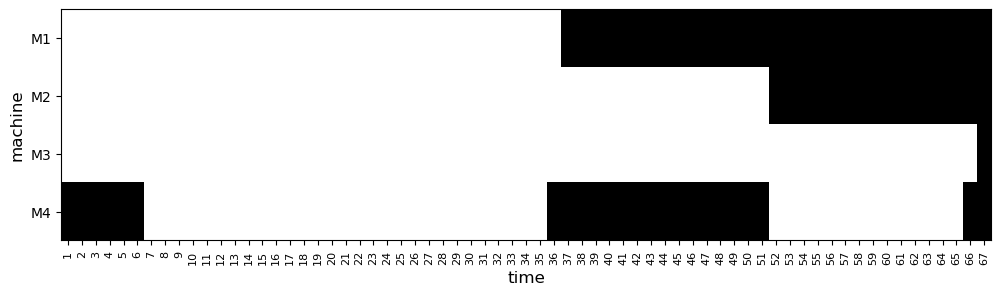

In [256]:
plt.figure(figsize=(12, 3))
plt.imshow(df_empty_time, cmap='Greys', aspect='auto', interpolation='nearest')

plt.xticks(ticks=np.arange(len(df_empty_time.columns)), labels=df_empty_time.columns, fontsize=8, rotation=90)
plt.yticks(ticks=np.arange(len(df_empty_time.index)), labels=df_empty_time.index, fontsize=10)
plt.xlabel('time', fontsize=12)
plt.ylabel('machine', fontsize=12)

plt.grid(False)

#plt.colorbar(label='0 or 1', orientation='vertical')
#plt.tight_layout()
plt.show()

In [257]:
#作れる製品のジョブセット生成
arrays = {}

for g in np.arange(1,1001):
    number_job=random.randint(1,4)
    max_number_process=random.randint(1,3)
    arrays[f"t_product{g}"]=np.zeros((int(number_job),int(max_number_process)))
    arrays[f"m_product{g}"]=np.zeros((int(number_job),int(max_number_process)))
    for i in np.arange(0,number_job):
        number_process=random.randint(1,max_number_process)
        for j in np.arange(0,number_process):
            arrays[f"t_product{g}"][i,j]=random.randint(3,6)
            arrays[f"m_product{g}"][i,j]=random.randint(1,4)
            
    arrays[f"v_product{g}"]=1+(number_job-1)*0.5
    if max_number_process>1:
        arrays[f"v_product{g}"]=arrays[f"v_product{g}"]+(max_number_process-1)*0.3
    
    #arrays[f"t_product{g}"][arrays[f"t_product{g}"]==0]=-1
    #arrays[f"m_product{g}"][arrays[f"m_product{g}"]==0]=-1    

#print(arrays["t_product5"])
#print(arrays["m_product5"])
#print(arrays["v_product5"])